# Bank Customer Churn Prediction

银行客户流失的预测

注意：这里用的是supervised learning !!!

实际情况下，dataframe很大的时候，可以先运行一个model看一下情况。

feature importance:random forest

相关性很大会影响feature selection，但不会影响tree model，tree model主要跟熵entropy的增减有关。

tree model很好用，random forest，基本都能用。

**In** this project, we use supervised learning models to identify customers who are likely to churn in the future. Furthermore, we will analyze top factors that influence user retention. [Dataset information](https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers).

## Contents


* [Part 1: Data Exploration](#Part-1:-Data-Exploration)
* [Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
* [Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)
* [Part 4: Feature Selection](#Part-4:-Feature-Selection)

# Part 0: Setup Google Drive Environment
check this [link](https://colab.research.google.com/notebooks/io.ipynb) for more info

In [4]:
# install pydrive to load data，import一些东西（这段是每个project都要做的）
# !pip install -U -q PyDrive

# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [3]:
# load data 1
# link = 'https://drive.google.com/open?id=17nbs4OBtrj7kq40Lf9laopynyp4LJDGn' #把google drive里面的file读进来了
# _, id = link.split('=')
# file = drive.CreateFile({'id':id}) # replace the id with id of file you want to access
# file.GetContentFile('bank_churn.csv')  

In [9]:
import numpy as np
import pandas as pd

churn_df = pd.read_csv('bank_churn.csv')
churn_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
# load data 2
# the recommended way to load data

# file_id='17nbs4OBtrj7kq40Lf9laopynyp4LJDGn'
# link='https://drive.google.com/uc?export=download&id={FILE_ID}'
# csv_url=link.format(FILE_ID=file_id)
# my_data = pd.read_csv(csv_url)
# my_data.head()

# Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [10]:
churn_df.head()  #要churn的人是1，没有churn的人是0

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
print ("Num of rows: " + str(churn_df.shape[0])) # row count 一共多少行（data shape）
print ("Num of columns: " + str(churn_df.shape[1])) # col count 一共多少列

Num of rows: 10000
Num of columns: 14


In [12]:
# check data info 能告诉你有没有data missing，object一定是string，比如categorical feature； integer一定是连续变量
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
# check the unique values for each column 看一看每一列里面的unique values有多少，有多少个不同的值：surname有重复，row number和id没有重复
churn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [14]:
# Get target variable：label,我们最后要classify的东西
y = churn_df['Exited']

In [15]:
# check the propotion of y = 1：churn的比例，流失率
# 解决imbalance data，例如80%的churn，20%不churn，类似这种
# imbalance 影响：可能就只关注不churn的人，不关注churn的人了，但是也许churn的人更需要关注
# 可能需要做一些sampling来解决imbalance
print(y.sum() / y.shape * 100)

[20.37]


### Part 1.2:  Understand the features

In [21]:
# check missing values：发现没有missing value
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [22]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [23]:
# understand Numerical feature
# discrete/continuous
# 'CreditScore', 'Age', 'Tenure', 'NumberOfProducts'
# 'Balance', 'EstimatedSalary'
churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe() #describe：看一下continuous variable的一些信息

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


In [71]:
# check the feature distribution
# pandas.DataFrame.describe()
# boxplot, distplot, countplot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

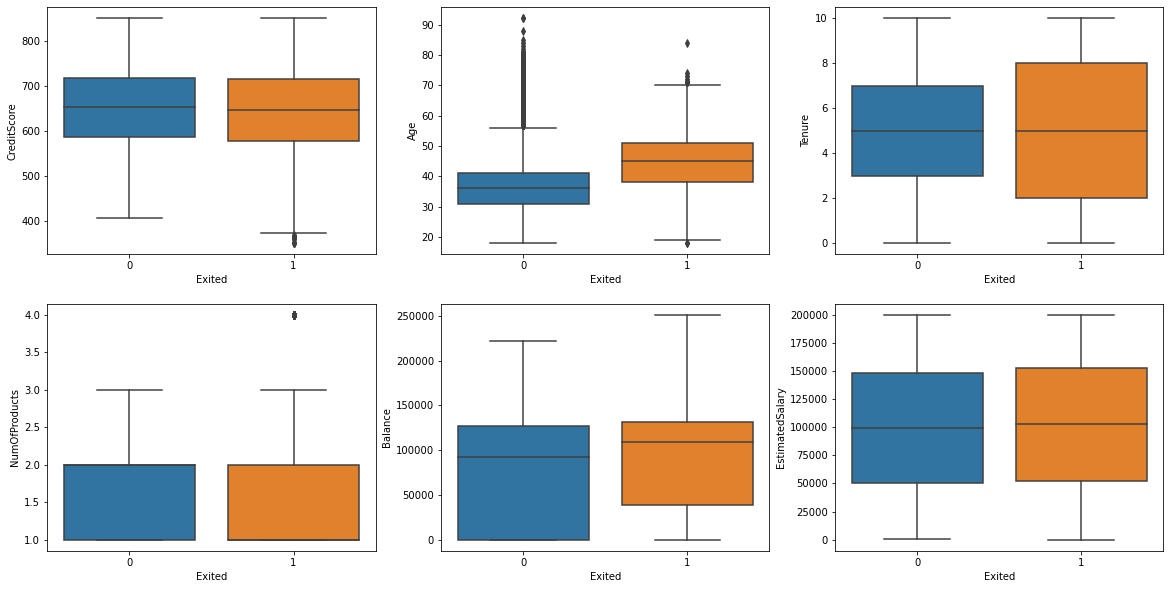

In [25]:
# boxplot for numerical feature
# boxplot: 均值，75分点和25分点之间的距离；不同年龄对churn的影响：年纪大的人容易churn；存款多的人也容易churn；
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=churn_df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=churn_df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=churn_df, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=churn_df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=churn_df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=churn_df, ax=axss[1][2])

<AxesSubplot:xlabel='Exited', ylabel='count'>

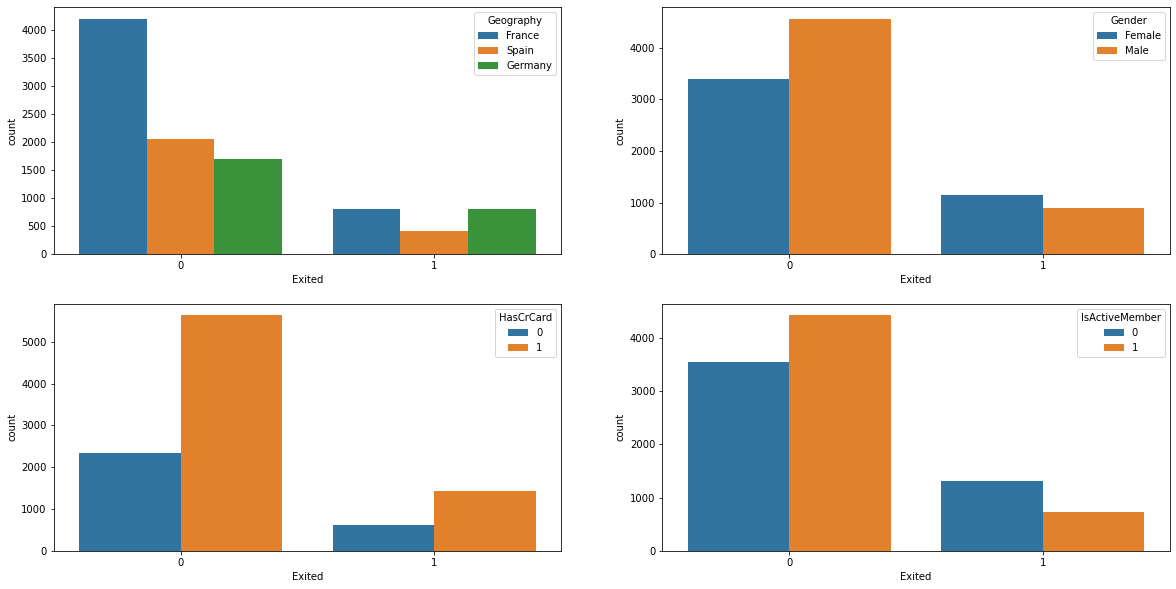

In [26]:
# understand categorical feature ：看一下categorical feature，churn的人跟国籍没啥关系，
# 'Geography', 'Gender'
# 'HasCrCard', 'IsActiveMember'
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=churn_df, ax=axss[0][0]) # hue: 在x或y标签划分的同时，再以hue标签划分统计个数
sns.countplot(x='Exited', hue='Gender', data=churn_df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=churn_df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=churn_df, ax=axss[1][1])

<AxesSubplot:>

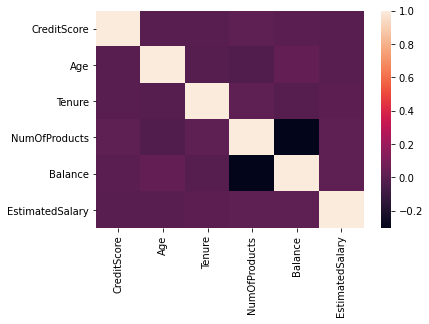

In [27]:
# correlations between features：　feature之间的关系，线性相关性，皮尔森系数？？？：发现都不是很相关
correlation = churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()

# show heapmap of correlations
sns.heatmap(correlation)

In [28]:
# check the actual values of correlations：相关性的具体数值
correlation

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.012238,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,-0.030680,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,0.013444,-0.012254,0.007784
NumOfProducts,0.012238,-0.030680,0.013444,1.000000,-0.304180,0.014204
Balance,0.006268,0.028308,-0.012254,-0.304180,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.014204,0.012797,1.000000


# Part 2: Feature Preprocessing

feature encoding, feature scaling

Read more for handling [categorical feature](https://github.com/scikit-learn-contrib/categorical-encoding), and there is an awesome package for [encoding](https://contrib.scikit-learn.org/categorical-encoding/#category-encoders).

In [29]:
# label encoding
churn_df['Gender'] = churn_df['Gender'] == 'Female'

france 00
german 01
spain 10

?????什么意思

什么叫共线性？
a+b=c,那么c完全可以用a和b的关系表现出来。可以通过germany和spain可以推出是不是france：在这个例子里面france + germany + spain = 1，严谨一些的话，可以加一个other column。

那么在例子中，我们就只需要两列，不需要3列了。


In [30]:
# one hot encoding：drop first：get dummies是根据column里面有什么，就生成什么类别。
churn_df = pd.get_dummies(churn_df, columns=['Geography'], drop_first=True)

In [31]:
churn_df.head(10) #true or false对python来说就是0和1，对数据没有影响，会自动转换

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,True,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,Hill,608,True,41,1,83807.86,1,0,1,112542.58,0,0,1
2,3,15619304,Onio,502,True,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,True,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,True,43,2,125510.82,1,1,1,79084.10,0,0,1
5,6,15574012,Chu,645,False,44,8,113755.78,2,1,0,149756.71,1,0,1
6,7,15592531,Bartlett,822,False,50,7,0.00,2,1,1,10062.80,0,0,0
7,8,15656148,Obinna,376,True,29,4,115046.74,4,1,0,119346.88,1,1,0
8,9,15792365,He,501,False,44,4,142051.07,2,0,1,74940.50,0,0,0
9,10,15592389,H?,684,False,27,2,134603.88,1,1,1,71725.73,0,0,0


In [32]:
# Get feature space by dropping useless feature：drop一些没有用的feature
to_drop = ['RowNumber','CustomerId','Surname','Exited']
X = churn_df.drop(to_drop, axis=1)
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,True,42,2,0.00,1,1,1,101348.88,0,0
1,608,True,41,1,83807.86,1,0,1,112542.58,0,1
2,502,True,42,8,159660.80,3,1,0,113931.57,0,0
3,699,True,39,1,0.00,2,0,0,93826.63,0,0
4,850,True,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,False,39,5,0.00,2,1,0,96270.64,0,0
9996,516,False,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,True,36,7,0.00,1,0,1,42085.58,0,0
9998,772,False,42,3,75075.31,2,1,0,92888.52,1,0


In [33]:
X.head()#得到想要的dataframe

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,True,42,2,0.00,1,1,1,101348.88,0,0
1,608,True,41,1,83807.86,1,0,1,112542.58,0,1
2,502,True,42,8,159660.80,3,1,0,113931.57,0,0
3,699,True,39,1,0.00,2,0,0,93826.63,0,0
4,850,True,43,2,125510.82,1,1,1,79084.10,0,1


# Part 3: Model Training and Result Evaluation


面试：为什么需要用这些模型？
因为喜欢，然后自己也熟悉，有点比较多，效果比较好之类的。然后讲一些模型的优点。
数据哪里来的：open data site from kagglo

### Part 3.1: Split dataset

In [34]:
# Splite data into training and testing：处理machine learning model的package
from sklearn import model_selection

# Reserve 20% for testing： 把想要分开的数据集分开，这里是8 2分
# X是churn_df.drop(to_drop, axis=1)
# y是churn_df['Exited']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 8000 observation with 11 features
test data has 2000 observation with 11 features


In [35]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
2960,778,True,29,7,123229.46,1,1,0,181221.09,1,0
4730,619,True,38,1,0.00,1,1,0,112442.63,0,1
3458,770,True,37,9,0.00,2,0,0,22710.72,0,0
1596,769,False,27,7,188614.07,1,1,0,171344.09,1,0
9457,678,False,28,2,109137.12,1,1,1,58814.41,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4538,710,False,33,1,0.00,2,1,0,168313.17,0,1
4217,587,False,35,5,121863.61,1,1,1,23481.69,1,0
4534,656,False,41,2,0.00,2,1,0,158973.77,0,0
1297,498,False,34,5,0.00,2,1,1,91711.66,0,0


In [36]:
# Scale the data, using standardization
# 方法1:standardization (x-mean)/std：不需要假设都是正态分布,算出mean和方差,然后做这个操作，取值范围不在[0,1]。（如果是满足正态分布，用这个）
# 方法2:normalization (x-x_min)/(x_max-x_min)：知道这一列的最小值和最大值，然后这个方法会把所有值放到[0,1]区间里面。(算法要求取值在[0,1]时候用这个)

#这里是做feature scaling,把原来数据的取值范围放到新的数据里面，能加快模型的训练速度，并且放入同样的取值区间里面，这样均衡每个feature，pca要求每个数据在相同区间里面
# 1. speed up gradient descent
# 2. same scale
# 3. algorithm requirments

# for example, use training data to train the standardscaler to get mean and std 
# apply mean and std to both training and testing data.
# fit_transform does the training and applying, transform only does applying.
# Because we can't use any info from test, and we need to do the same modification
# to testing data as well as training data

# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
# https://scikit-learn.org/stable/modules/preprocessing.html

# example:（重要操作）
# scalar.fit -> min:1, max:100：根据当前数据做操作
# scalar.transform -> apply min:1, max:100 to X_train
# scalar.transform -> apply min:1, max:100 to X_test

# min & max example:
#fit+transform：[1,2,3,4,5,6]:走一遍，找到min和max，（1，6）（这里是fit，然后存在scalar里面），
#那么（scalar.min=1,scalar.max=6）,那么：transform[（1-1）/（6-1），（2-1）/（6-1），。。。。。]
# scalar.fit (train) -> min:1, max:100：算出mean
# scalar.transform (apply to x)-> apply min:1, max:100 to X_train
# scalar.transform -> apply min:1, max:100 to X_test


# 把从training data里面的min和max放入testing data里面做transfrom，不做fit：
# 因为testing data是未来才能看到的数据，现在不应该知道这些数据，所以从training data里面fit算出来的数据是应该要直接放入testing里面计算的，
# training和testing data的操作需要保持一致性
from sklearn.preprocessing import StandardScaler#Scaler创建一个object
scaler = StandardScaler()
# fit_transform()的作用就是先拟合数据，然后转化它将其转化为标准形式
X_train = scaler.fit_transform(X_train)
# 就是这两步：scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# tranform()的作用是通过找中心和缩放等实现标准化
X_test = scaler.transform(X_test)

In [37]:
X_train

array([[ 1.32570235,  1.09388997, -0.94664511, ...,  1.41557371,
         1.73668197, -0.57003687],
       [-0.31602951,  1.09388997, -0.0912429 , ...,  0.2196167 ,
        -0.57581067,  1.75427249],
       [ 1.24309949,  1.09388997, -0.18628759, ..., -1.34069022,
        -0.57581067, -0.57003687],
       ...,
       [ 0.06600872, -0.91416872,  0.19389117, ...,  1.02872529,
        -0.57581067, -0.57003687],
       [-1.56539778, -0.91416872, -0.47142166, ..., -0.14086461,
        -0.57581067, -0.57003687],
       [-1.29693849,  1.09388997, -1.0416898 , ...,  0.82227029,
        -0.57581067, -0.57003687]])

归一化：

x1:[1,10000] ->[0,1]

x2:[1,10] ->[0,1]

knn
   x1,x2

这时x1 domine整个区间，x2就没什么作用了

d0[10000,1]

d1[1,10]

d2[5000,10]

### Part 3.2: Model Training and Selection






In [38]:
# build models：创建对应的object
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # do prediction with SVM model

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

# SVC
classifier_SVC = SVC()


In [39]:
# Train the model
classifier_logistic.fit(X_train, y_train)

LogisticRegression()

这里，结束model training！！！！

In [40]:
# Prediction of test data
classifier_logistic.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
# Accuracy of test data：这里默认accuracy就是score
classifier_logistic.score(X_test, y_test)

0.8075

In [42]:
# Use 5-fold Cross Validation to get the accuracy for different ：这里做Cross Validation 
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5) #扔进去要train的model，以及training的data，以及要做几个fold的cross validation
    print(cv_score) #根据training算出来的5个accuracy
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.813125 0.80625  0.810625 0.814375 0.8125  ]
Model accuracy of Logistic Regression is 0.811375
[0.824375 0.815625 0.83375  0.82625  0.808125]
Model accuracy of KNN is 0.8216249999999998
[0.859375 0.851875 0.86875  0.86875  0.854375]
Model accuracy of Random Forest is 0.860625


In [43]:
# 完整的SVC model train以及cross validation

# do prediction with SVM model
from sklearn.svm import SVC 

classifier_SVC = SVC()

cv_score = model_selection.cross_val_score(classifier_SVC, X_train, y_train, cv=5)
print('Model accuracy of SVM is: ' + str(cv_score.mean()))


Model accuracy of SVM is: 0.8550000000000001


### Part 3.3: Use Grid Search to Find Optimal Hyperparameters


超参数：调试参数

In [44]:
from sklearn.model_selection import GridSearchCV #GridSearch就是把所有情况都运行一遍，一共6种情况

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

#### Part 3.3.1: Find Optimal Hyperparameters - LogisticRegression


In [45]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2

# ('l1', 1) ('l1', 5) ('l1', 10) ('l2', 1) ('l2', 5) ('l2', 10) --->6种情况，扔进model的parameter里面去train，运行6遍，最后找一个最好的
parameters = {
    'penalty':('l1', 'l2'), #tuple，里面放可以选择的数值
    'C':(1, 5, 10) # c=1/lamda,c需要变大
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (1, 5, 10), 'penalty': ('l1', 'l2')})

In [46]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score: 0.811625
Best parameters set:
C:1
penalty:l1


In [47]:
# best model
best_LR_model = Grid_LR.best_estimator_

#### Part 3.3.2: Find Optimal Hyperparameters: KNN

In [49]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[3,5,7,10] #这些值怎么选的？：偶数不好，因为可以分成两个一样的数字，例如10=5+5，不能判断准确情况
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 10]})

In [50]:
# best k
(Grid_KNN)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 10]})

#### Part 3.3.3: Find Optimal Hyperparameters: Random Forest

In [51]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [40,60,80] 
    #n_estimators：the number of trees in the random forest;tree的数量和depth深度很重要！！！数字是自己设置的，一边调参数一边跑model，不行的话再继续调，再试
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [40, 60, 80]})

In [52]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.8614999999999998
Best parameters set:
n_estimators:60


In [53]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)
---Accuracy好么？？？记住：回答永远是It depends！！！
（重要！！！！）

class of interest as positive

churn的就是posotive

TP: correctly labeled real churn

这里，false positive很重要，就是没有churn但是我们把他认为成了churn。
fn：很多churn但是我们认为他们没有churn

Precision(PPV, positive predictive value): tp / (tp + fp);
Total number of true predictive churn divided by the total number of predictive churn;
High Precision means low fp, not many return users were predicted as churn users. 


Recall(sensitivity, hit rate, true positive rate): tp / (tp + fn)
Predict most postive or churn user correctly. High recall means low fn, not many churn users were predicted as return users.

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for ' + classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.864
precision is: 0.8113207547169812
recall is: 0.4919908466819222


<ipython-input-69-24f297323945>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + class_names)
<ipython-input-69-24f297323945>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + class_names)


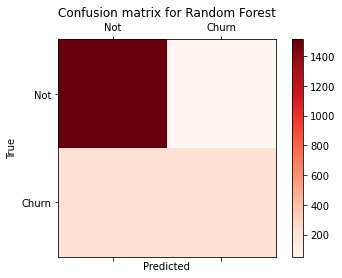

Logistic Regression
Accuracy is: 0.8085
precision is: 0.68
recall is: 0.2334096109839817


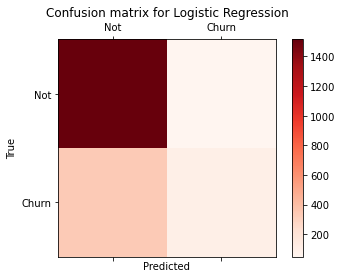

In [70]:
#画图，图不重要，数据很重要
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
]

draw_confusion_matrices(confusion_matrices)

logistic regression里面，accuracy看起来很高，但是recall很差，说明fn做的很差

### Part 3.4: Model Evaluation - ROC & AUC

RandomForestClassifier, KNeighborsClassifier and LogisticRegression have predict_prob() function 

#### Part 3.4.1: ROC of RF Model

ROC曲线



In [54]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest：因为有threshold，所以要放predict probability
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1] 
#[:,1]表示就取第一列，slicing，输出是对每一个class都会有一个probability，是n*n的 
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
#有threshold，所以需要roc cuve

In [55]:
best_RF_model.predict_proba(X_test) #　label就是0和1，一共两列

array([[0.98333333, 0.01666667],
       [0.96666667, 0.03333333],
       [0.68333333, 0.31666667],
       ...,
       [0.16666667, 0.83333333],
       [0.81666667, 0.18333333],
       [0.98333333, 0.01666667]])

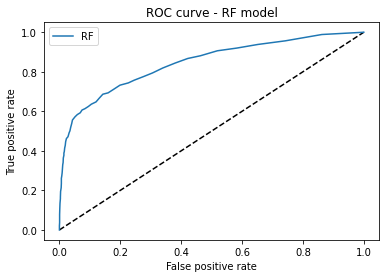

In [56]:
# ROC curve of Random Forest result：random forest看起来会好一点
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [57]:
from sklearn import metrics

# AUC score：area under the curve曲线下方面积，auc越高，in general，这个model越好
metrics.auc(fpr_rf,tpr_rf)

0.8446190582857879

#### Part 3.4.1: ROC of LR Model

In [58]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)

In [59]:
best_LR_model.predict_proba(X_test)

array([[0.88920999, 0.11079001],
       [0.95922355, 0.04077645],
       [0.8144714 , 0.1855286 ],
       ...,
       [0.84170882, 0.15829118],
       [0.82255818, 0.17744182],
       [0.94965491, 0.05034509]])

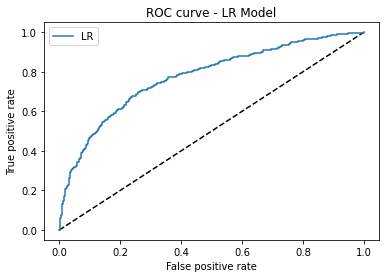

In [60]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [61]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.7744831493738937

# Part 4: Feature Importance

我们说的feature importance只是这个model带给我们的，只是相对的对于这个model来说的importance，但是不是绝对性的。且只针对这个model。不同的model本身就应该有不同的feature importance。不同的model下的feature importance之间是无法比较的。

### Part 4.1:  Logistic Regression Model - Feature Selection Discussion 

The corelated features that we are interested in: (total_day_minutes, total_day_charge), (total_eve_minutes, total_eve_charge), (total_intl_minutes, total_intl_charge).



In [62]:
#相关性：完全正相关 
X_with_corr = X.copy()
X_with_corr['SalaryInRMB'] = X['EstimatedSalary'] * 6.91
X_with_corr.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,SalaryInRMB
0,619,True,42,2,0.00,1,1,1,101348.88,0,0,700320.7608
1,608,True,41,1,83807.86,1,0,1,112542.58,0,1,777669.2278
2,502,True,42,8,159660.80,3,1,0,113931.57,0,0,787267.1487
3,699,True,39,1,0.00,2,0,0,93826.63,0,0,648342.0133
4,850,True,43,2,125510.82,1,1,1,79084.10,0,1,546471.1310


In [63]:
# add L1 regularization to logistic regression：把两个强相关的feature其中一个置0
# check the coef for feature selection
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_with_corr)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.05, solver='liblinear')
LRmodel_l1.fit(X_l1, y)
LRmodel_l1.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]), \
                      X_with_corr.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
Age: 0.7369
IsActiveMember: -0.5109
Geography_Germany: 0.3177
Gender: 0.2452
Balance: 0.1536
CreditScore: -0.0493
NumOfProducts: -0.0468
Tenure: -0.0308
SalaryInRMB: 0.0127
HasCrCard: -0.0058
EstimatedSalary: 0.0002
Geography_Spain: 0.0


In [64]:
# L1 another example
# add L1 regularization to logistic regression
# check the coef for feature selection
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_with_corr)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.1, solver='liblinear')
LRmodel_l1.fit(X_l1, y)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
Age : 0.7495
IsActiveMember : -0.524
Geography_Germany : 0.3251
Gender : 0.254
Balance : 0.159
CreditScore : -0.0568
NumOfProducts : -0.0528
Tenure : -0.0384
HasCrCard : -0.0131
EstimatedSalary : 0.0106
SalaryInRMB : 0.0095
Geography_Spain : 0.0027


In [65]:
# add L2 regularization to logistic regression：把两个强相关的feature的相关性置成一样
# check the coef for feature selection
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear')
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]
print ("Logistic Regression (L2) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l2.coef_[0]), \
                      X_with_corr.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))
  

Logistic Regression (L2) Coefficients
Age: 0.751
IsActiveMember: -0.5271
Geography_Germany: 0.3313
Gender: 0.2591
Balance: 0.1624
CreditScore: -0.0637
NumOfProducts: -0.0585
Tenure: -0.0452
HasCrCard: -0.0199
Geography_Spain: 0.0139
EstimatedSalary: 0.0137
SalaryInRMB: 0.0137


In [66]:
# L2 another example
# add L2 regularization to logistic regression
# check the coef for feature selection
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))
  

Logistic Regression (L2) Coefficients
Age : 0.751
IsActiveMember : -0.5271
Geography_Germany : 0.3313
Gender : 0.2591
Balance : 0.1624
CreditScore : -0.0637
NumOfProducts : -0.0585
Tenure : -0.0452
HasCrCard : -0.0199
Geography_Spain : 0.0139
SalaryInRMB : 0.0137
EstimatedSalary : 0.0137


### Part 4.2:  Random Forest Model - Feature Importance Discussion

In [67]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
Age: 0.2375
EstimatedSalary: 0.1469
CreditScore: 0.1423
Balance: 0.1419
NumOfProducts: 0.1336
Tenure: 0.0813
IsActiveMember: 0.0408
Geography_Germany: 0.0267
HasCrCard: 0.0183
Gender: 0.0181
Geography_Spain: 0.0127


In [68]:
# another example
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2375
EstimatedSalary : 0.1474
CreditScore : 0.144
Balance : 0.1425
NumOfProducts : 0.1311
Tenure : 0.0811
IsActiveMember : 0.0406
Geography_Germany : 0.0263
Gender : 0.0184
HasCrCard : 0.0178
Geography_Spain : 0.0132
